# Decision Tree

## EDA

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# reading xlsx doc
df = pd.read_excel('heart_disease.xlsx')
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [262]:
# reading sheet Heart_disease
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [263]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [264]:
# drop null
df.dropna(inplace=True)
# df.info()

In [265]:
# summary
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,53.425532,132.449173,202.652482,137.167849,0.891253,0.979905
std,9.099243,19.243667,111.654072,25.608434,1.093875,1.128783
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,269.750000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


There are few Incorrect data in the given dataset, (trestbps can't be 0, similarly cholestral).

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

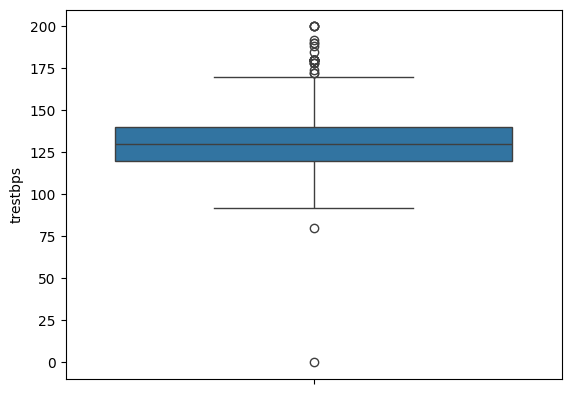

In [266]:
# boxplots
sns.boxplot(df['trestbps'])
sns

<Axes: ylabel='chol'>

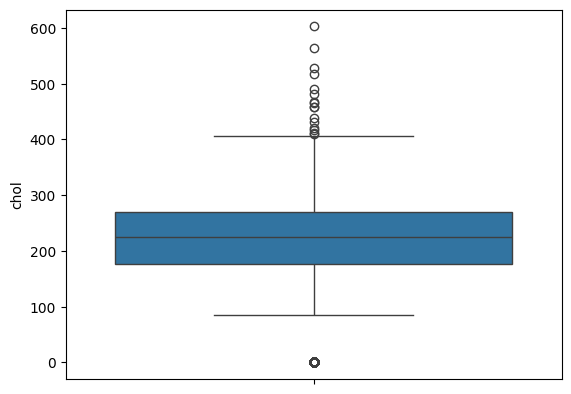

In [267]:
sns.boxplot(df['chol'])

In [268]:
# removing 0 values
# higher values may not be errors / inconsistencies
df = df[df['trestbps'] != 0]
df = df[df['chol'] != 0]

In [269]:
# duplicates
df.duplicated().sum()

1

In [270]:
# drop duplicates
df.drop_duplicates(inplace=True)

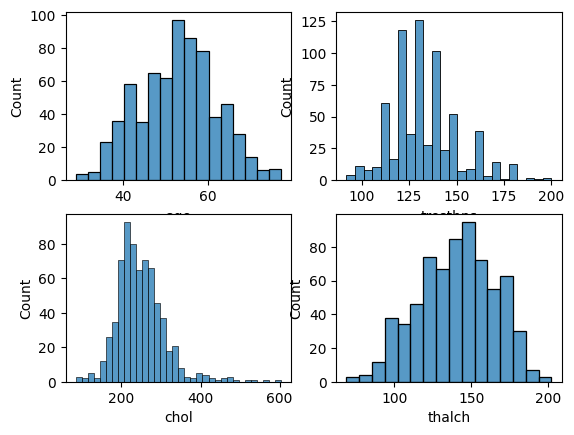

In [271]:
# histograms
plt.subplot(2,2,1)
sns.histplot(df['age'])
plt.subplot(2,2,2)
sns.histplot(df['trestbps'])
plt.subplot(2,2,3)
sns.histplot(df['chol'])
plt.subplot(2,2,4)
sns.histplot(df['thalch'])
plt.show()

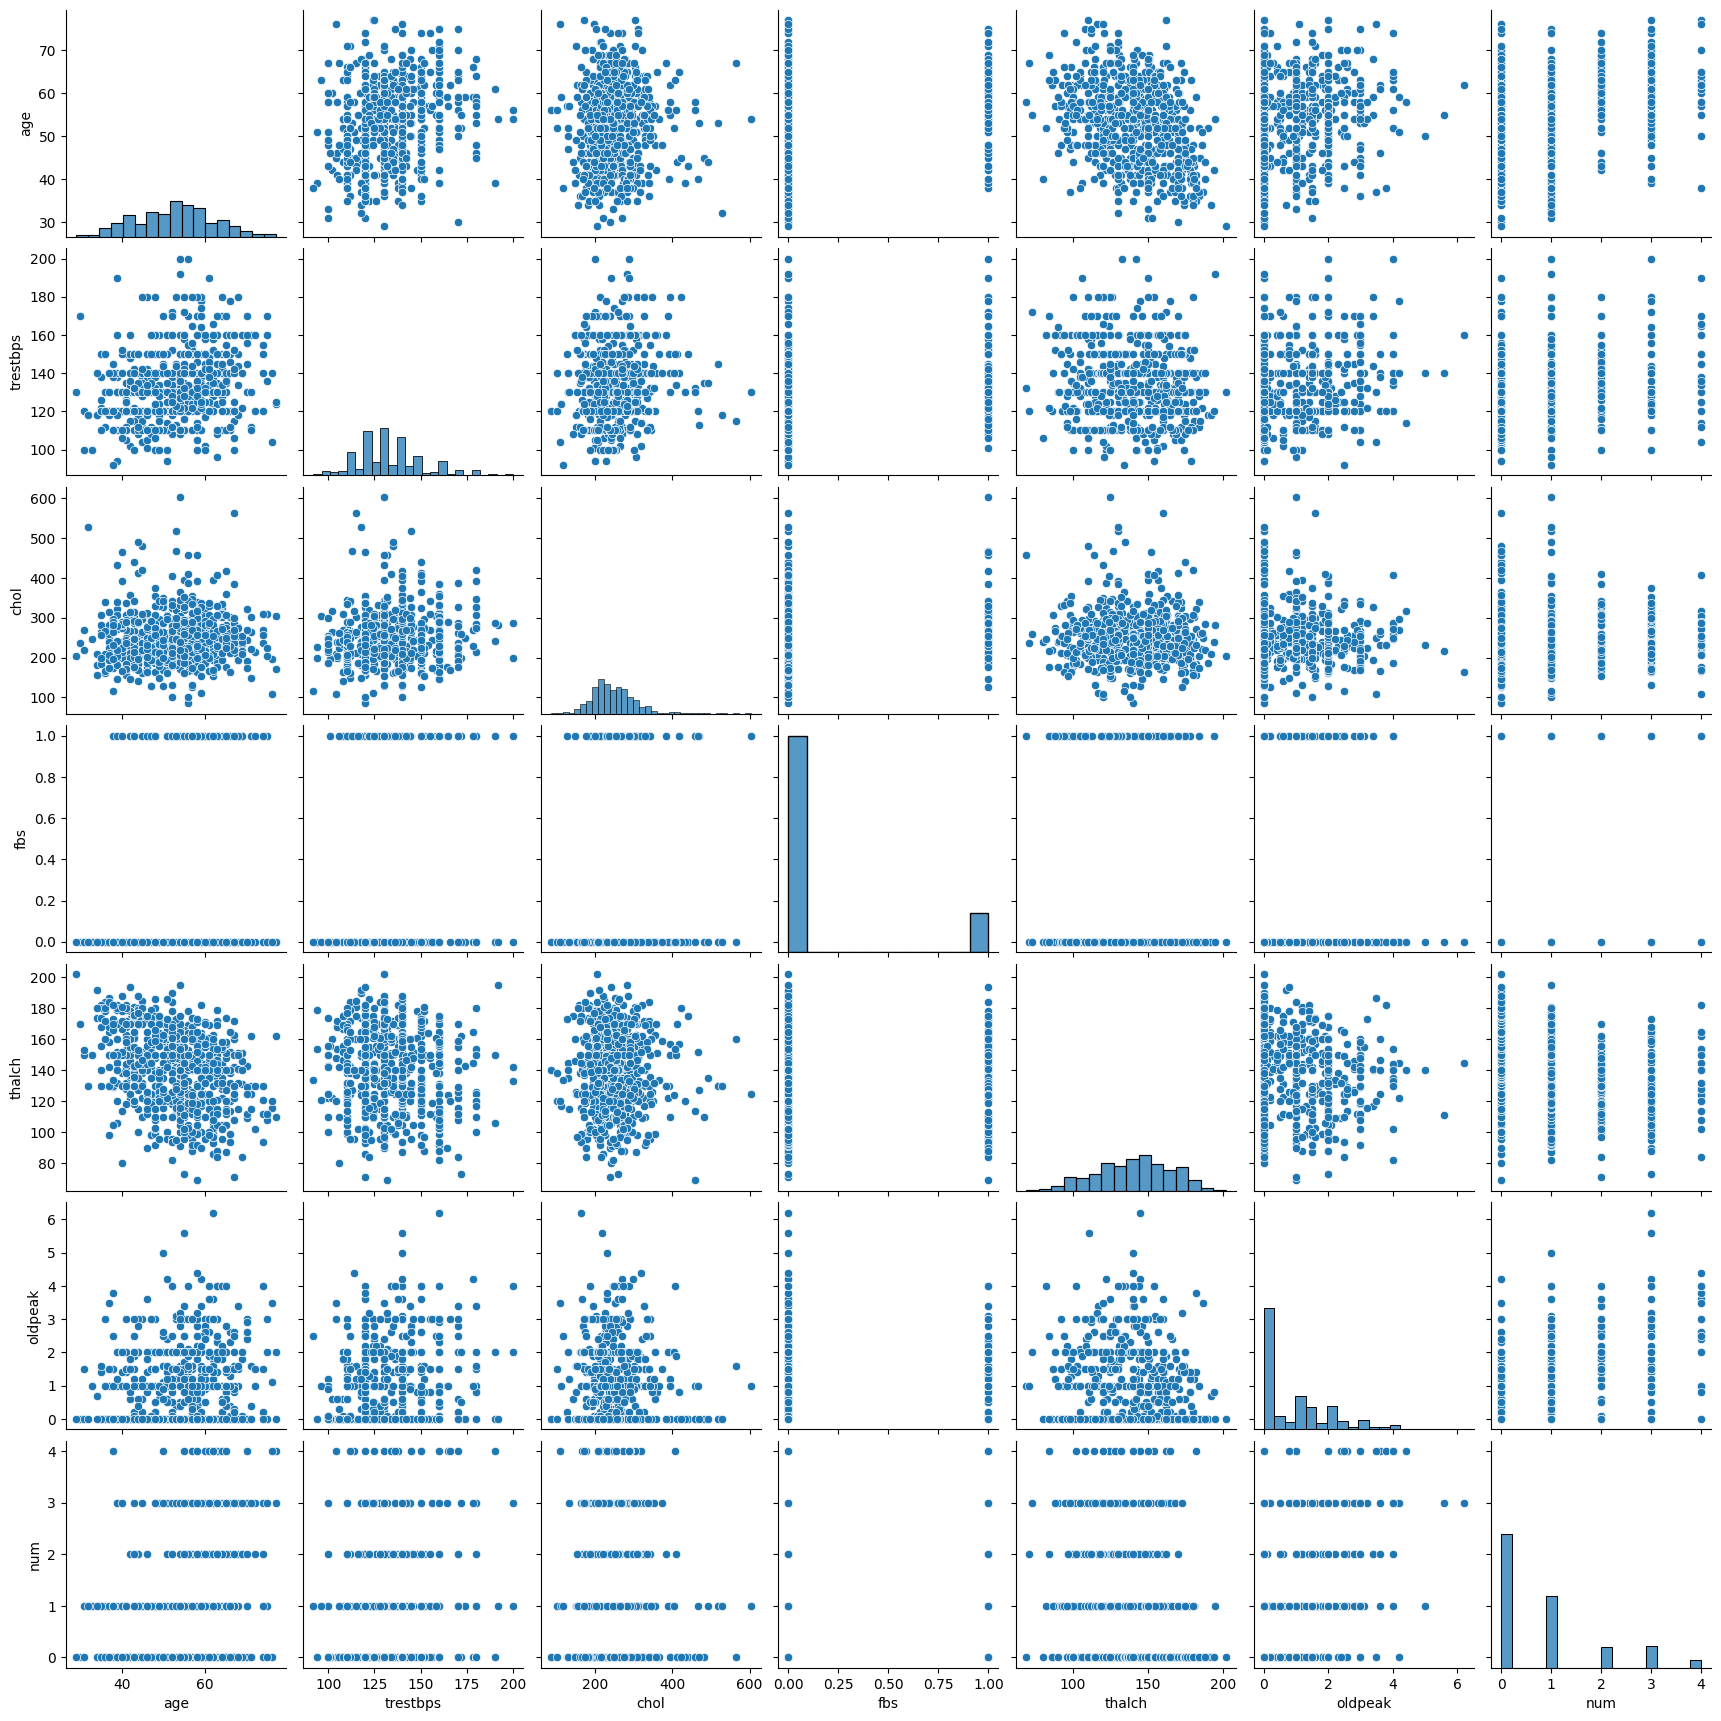

In [272]:
# pairplots
sns.pairplot(df)

## Feature Engineering

In [273]:
# Convert sex and exang in binary
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0, 'Unknown': -1}).fillna(-1).astype(int)
df['exang'] = df['exang'].map({True: 1, False: 0, 'FALSE': 0}).fillna(-1).astype(int)

In [274]:
# label encoding on categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,64,1,0,134,273,0,1,102,1,4.0,0,1,4
899,65,1,0,136,248,0,1,140,1,4.0,0,2,4
900,61,1,0,190,287,1,0,150,1,2.0,0,2,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4


<Axes: >

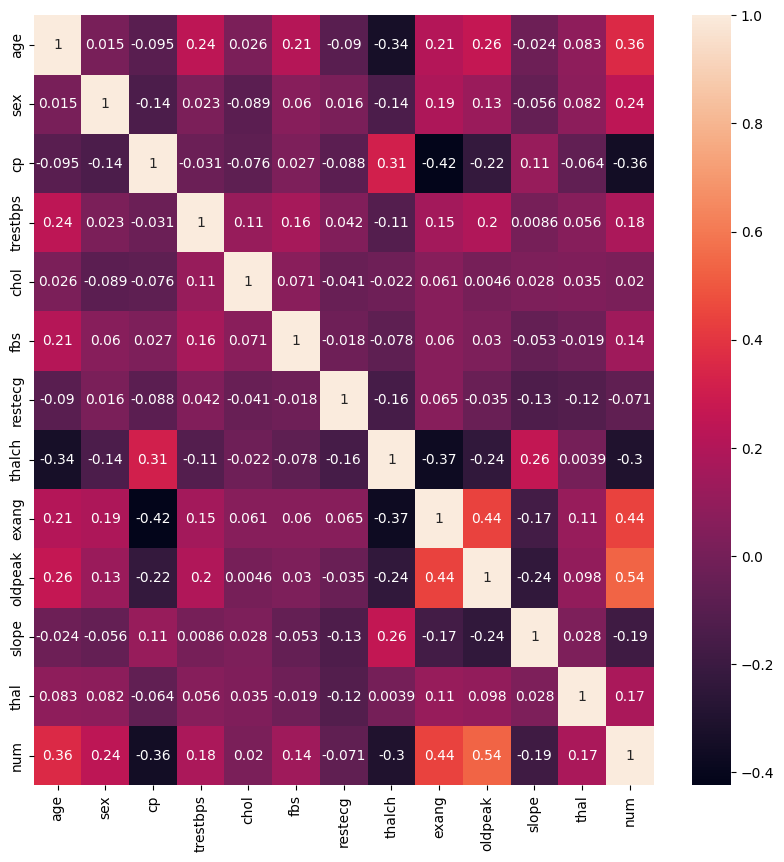

In [275]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Decision Tree Classification

In [276]:
# split into train and test dataset
from sklearn.model_selection import train_test_split
X = df.drop('num', axis=1)
y = df['num']

In [277]:
from posixpath import split
split = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = split

In [298]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [299]:
from sklearn import tree
text = tree.export_text(dt,max_depth=2)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- feature_0 <= 56.50
|   |   |--- class: 0
|   |--- feature_0 >  56.50
|   |   |--- class: 0



In [300]:
#Predicting on test data
preds = dt.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,94
1,44


In [301]:
np.mean(preds==y_test)

0.6884057971014492

## Hyperparameter Tuning

### Entropy

Given Depth of 2, We got accuracy of 59.42

Given Depth of 3, We got accuracy of 63.04

Given Depth of 4, We got accuracy of 60.14

Given Depth of 5, We got accuracy of 65.21

Given Depth of 6, We got accuracy of 63.04

Given Depth of 7, We got accuracy of 59.42

Given Depth of 8, We got accuracy of 58.69


### Gini Impurity
Given Depth of 2, We got accuracy of 68.84

Given Depth of 3-5, We got accuracy of 66.66

## Model evaluation and Analysis

In [302]:
dt.feature_importances_

array([0.11219168, 0.        , 0.73297984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15482849, 0.        ,
       0.        , 0.        ])

Age, cp & exang are three important factors in determining level of cancer.

## Interview Questions:
**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**


*   Max-depth: Samller values prevents overfitting But leads to underfitting, take the value that is best fit.
*   Citerion: For classification model, we have entropy / gini impurity that helps in calculating randomness of output.
For regression models, we have residual sum of squares.



**2. What is the difference between the Label encoding and One-hot encoding?**



*   Label encoding: Assign unique integer to each category in its own column.
*   One-hot encoding: Creates binary column for every category in categorical column.


